In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from scipy.stats import skew
import scipy.stats as st

 *NOTA IMPORTANTE!!!*

Para este ejercicio se ha cogido un df de los crímenes en los Angeles entre el 2010 y 2017. Debido a la cantidad de datos que contenia (más de un millón y medio), pesaba demasiado y no se podía subir a git. De esta manera, se ha tenido que disminuir el df para poder guardarlo en el repositorio de git. 

    Para ello hemos:
        1. filtrado los datos y nos hemos quedado con solo aquellos datos del 2017
        2. eliminado todas las filas que contenían al menos, 1 nan (no es lo que más nos gusta pero el objetivo principal, as ser un archivo académico, era poder subirlo a git para poder trabajr con él desde diferentes dispositivos)


In [3]:
# df = pd.read_csv('Crime_data_2010_2017.csv', encoding='ISO-8859-1')

In [4]:
# def año (date=df['Date Occurred']):
#     return date.split('/')[2]


In [5]:
#df['Year'] = df['Date Occurred'].apply(año)

In [6]:
#df.head()

In [7]:
#pd.to_numeric(df.Year)

In [8]:
#df2 = df[df['Year']=='2017']

In [9]:
#df2.to_csv('Crime_Data_2017.csv')

In [3]:
df = pd.read_csv('../DATA/Crime_Data_2017.csv')

In [11]:
# df.dropna(how='any', inplace=True)

In [12]:
# df.to_csv('Crime_Data_2017.csv')

In [13]:
df.head()

,Unnamed: 0,Unnamed: 0.1,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,...,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Address,Cross Street,Location,Year
0,30,1428639,170104918,01/16/2017,01/16/2017,820,1,Central,111,624,...,102.0,SIDEWALK,308.0,STICK,IC,Invest Cont,ARCADIA,SPRING,"(34.0565, -118.2411)",2017
1,44,1429591,170100514,01/07/2017,01/07/2017,1040,1,Central,159,230,...,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,7TH,DECATUR,"(34.0348, -118.235)",2017
2,57,1429604,170100537,01/16/2017,01/16/2017,5,1,Central,162,230,...,102.0,SIDEWALK,307.0,VEHICLE,AO,Adult Other,8TH ST,OLIVE ST,"(34.0459, -118.2579)",2017
3,60,1429607,170100540,01/16/2017,01/16/2017,1955,1,Central,124,230,...,102.0,SIDEWALK,200.0,KNIFE WITH BLADE 6INCHES OR LESS,AA,Adult Arrest,2ND,MAIN,"(34.0514, -118.2451)",2017
4,61,1429608,170100541,01/16/2017,01/16/2017,2315,1,Central,176,626,...,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,8TH,WALL,"(34.0401, -118.2504)",2017


In [14]:
df.shape

(12961, 25)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12961 entries, 0 to 12960
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              12961 non-null  int64  
 1   Unnamed: 0.1            12961 non-null  int64  
 2   DR Number               12961 non-null  int64  
 3   Date Reported           12961 non-null  object 
 4   Date Occurred           12961 non-null  object 
 5   Time Occurred           12961 non-null  int64  
 6   Area ID                 12961 non-null  int64  
 7   Area Name               12961 non-null  object 
 8   Reporting District      12961 non-null  int64  
 9   Crime Code              12961 non-null  int64  
 10  Crime Code Description  12961 non-null  object 
 11  MO Codes                12961 non-null  object 
 12  Victim Age              12961 non-null  float64
 13  Victim Sex              12961 non-null  object 
 14  Victim Descent          12961 non-null

In [16]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Code,Year
count,12961.000000,1.296100e+04,1.296100e+04,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.0
mean,76028.337242,1.506235e+06,1.710270e+08,1358.163490,10.150837,1062.180387,426.164879,34.937273,135.688527,339.605509,2017.0
std,46549.477653,4.737261e+04,6.459390e+05,688.507205,6.416114,637.827749,236.009918,14.752338,120.693282,127.825638,0.0
min,30.000000,1.428639e+06,1.701005e+08,1.000000,1.000000,101.000000,110.000000,10.000000,101.000000,101.000000,2017.0
25%,31924.000000,1.461471e+06,1.704009e+08,900.000000,4.000000,411.000000,220.000000,23.000000,101.000000,218.000000,2017.0
50%,79695.000000,1.509243e+06,1.712009e+08,1500.000000,12.000000,1203.000000,236.000000,32.000000,102.000000,400.000000,2017.0
75%,117112.000000,1.547937e+06,1.715180e+08,1930.000000,15.000000,1595.000000,624.000000,46.000000,102.000000,400.000000,2017.0
max,151518.000000,1.584246e+06,1.799089e+08,2359.000000,21.000000,2189.000000,956.000000,99.000000,811.000000,516.000000,2017.0


In [17]:
df.describe(include=object)

,Date Reported,Date Occurred,Area Name,Crime Code Description,MO Codes,Victim Sex,Victim Descent,Premise Description,Weapon Description,Status Code,Status Description,Address,Cross Street,Location
count,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961
unique,252,252,21,76,10064,3,13,101,63,5,5,2351,2569,6208
top,08/20/2017,04/23/2017,77th Street,ROBBERY,0416,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,6TH ST,BROADWAY,"(0, 0)"
freq,82,86,1361,2959,463,7448,6616,6343,6917,9944,9944,208,262,366


In [18]:
df.isnull().sum()

Unnamed: 0                0
Unnamed: 0.1              0
DR Number                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area ID                   0
Area Name                 0
Reporting District        0
Crime Code                0
Crime Code Description    0
MO Codes                  0
Victim Age                0
Victim Sex                0
Victim Descent            0
Premise Code              0
Premise Description       0
Weapon Used Code          0
Weapon Description        0
Status Code               0
Status Description        0
Address                   0
Cross Street              0
Location                  0
Year                      0
dtype: int64

In [19]:
df[df.duplicated()].count()

Unnamed: 0                0
Unnamed: 0.1              0
DR Number                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area ID                   0
Area Name                 0
Reporting District        0
Crime Code                0
Crime Code Description    0
MO Codes                  0
Victim Age                0
Victim Sex                0
Victim Descent            0
Premise Code              0
Premise Description       0
Weapon Used Code          0
Weapon Description        0
Status Code               0
Status Description        0
Address                   0
Cross Street              0
Location                  0
Year                      0
dtype: int64

In [20]:
df.dropna(how='all',inplace=True)

In [21]:
df.isnull().sum()

Unnamed: 0                0
Unnamed: 0.1              0
DR Number                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area ID                   0
Area Name                 0
Reporting District        0
Crime Code                0
Crime Code Description    0
MO Codes                  0
Victim Age                0
Victim Sex                0
Victim Descent            0
Premise Code              0
Premise Description       0
Weapon Used Code          0
Weapon Description        0
Status Code               0
Status Description        0
Address                   0
Cross Street              0
Location                  0
Year                      0
dtype: int64

In [23]:
#df.drop(columns=['Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4'], inplace=True)

Moda, mediana, media, mínimo y máximo

In [24]:
moda = df['Crime Code Description'].mode()
media = df['Victim Age'].mean()
mediana = df['Victim Age'].median()
minimo = df['Victim Age'].min()
maximo = df['Victim Age'].max()
print(moda, '----', media, '----', mediana, '----', minimo, '----', maximo)

0    ROBBERY
dtype: object ---- 34.93727335853715 ---- 32.0 ---- 10.0 ---- 99.0


Gráficos

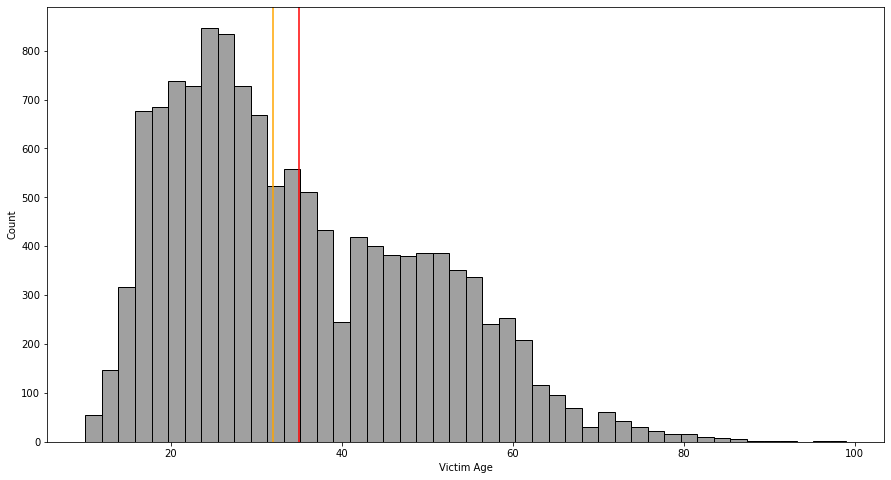

In [25]:
plt.figure(figsize=(15,8))
sns.histplot(data = df, x = "Victim Age", color = "grey")
plt.axvline(media, color='red')
plt.axvline(mediana, color='orange');

Queremos saber qué tipos de crímenes son los más dados y la edad de las víctimas de estos crímenes. 

Con los datos obtenidos arriba, podemos ver que el crímen más cometido en 2017 en Los Ángeles es el robatorio y las víctimas tienen una edad media de 35 años, aunque hay víctimas de hasta los 99 años (solo 1 persona con esta edad), cosa que nos afecta a la media. La víctima más joven de ese año, tenia 10 años.

Con la gráfica obtenida arriba, también podemos ver que nuestros datos están sasgados positivamente, es decir, con una 'cola' a la derecha. De esta forma también podemos ver que tenemos muchas víctimas de edades concentradas desde los 20 (aproximadamente) hasta los 32 (aproximadamente) y luego, en menos frecuencia, hasta los 99 (disminuyendo cada vez más conforme va aumentando la edad). Esto lo podremos estudiar más a fondo con la gráfica de cajas más adelante.

Desviación respecto a la media, varianza y desviación típica:

In [29]:
varianza = df["Victim Age"].var()
print(varianza)

217.63148173152555


In [30]:
desviacion_estandar = df["Victim Age"].std()
desviacion_estandar

14.752338178455833

Con el resultado obtenido con la desviación estándard, y viendo la gráfica de arriba (histplot), podemos ver más en detalle el por qué de la diferencia entre la media (línea amarilla) y  la mediana (línea roja), teniendo una desviación estandard de 14,75. Esto se puede deber a los outliers que contienen nuestros datos
Vamos a investigar más sobre los outliers.

Percentiles y rangos intercuartílicos

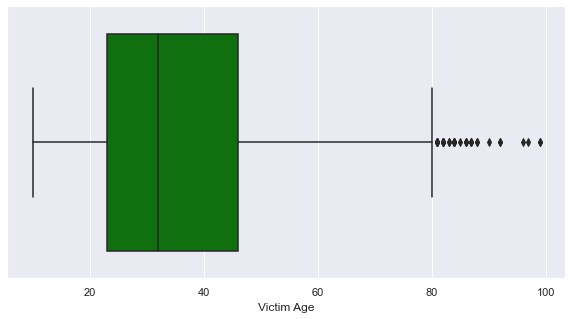

In [31]:
plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")

# Creando el grafico de cajas
sns.boxplot(data = df, x =  "Victim Age", color=  "green");

Con la gráfica de cajas obtenida, podemos ver la concentración de edades de las víctimas menores de 32 años, de la que hablabamos antes, en la parte izquierda de la mediana (línea negra dentro de la caja), la cola que se forma a la parte derecha de la mediana, y sobretodo, nuestros outliers. 
Ahora sabemos que los outliers, o edades que estan causando la desviación de la media de las edades de las víctimas, van de 80 a 99 años. 

Ahora vamos a ver más en detalle la concentración de las edades, con números exactos, usando los rangos intercuartílicos.

In [32]:
q3, q1 = np.percentile(df["Victim Age"], [75, 25])

print(q1,'----',q3)

23.0 ---- 46.0


Con los datos obtenidos podemos ver que:
 - El 25% de nuestras víctimas se encuentran por debajo de 23 años, sabiendo que el mínimo de edad es 10
 - El 50% de nuestras víctimas se encuntran por debajo de 46 años
 - El 25% de nuestras víctimas se encuentran por encima de los 46 años, sabiendo que la maxima edad es de 99



In [33]:
riq = q3 - q1
print("El rango intercuartílico es:", riq)

El rango intercuartílico es: 23.0


Volviendo a la dispersión de nuestros datos, con estos últimos rangos obtenidos, podemos ver como se van dispersando nuestros datos conforme avanzamos con las edades de las víctimas. 
A medida que aumenta la edad de las víctimas, tenemos menos casos.

Coeficiente de variación

In [37]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'DR Number', 'Date Reported',
       'Date Occurred', 'Time Occurred', 'Area ID', 'Area Name',
       'Reporting District', 'Crime Code', 'Crime Code Description',
       'MO Codes', 'Victim Age', 'Victim Sex', 'Victim Descent',
       'Premise Code', 'Premise Description', 'Weapon Used Code',
       'Weapon Description', 'Status Code', 'Status Description', 'Address',
       'Cross Street', 'Location ', 'Year'],
      dtype='object')

In [38]:
df['Area Name'].unique()

array(['Central', 'Rampart', 'Southwest', 'Hollenbeck', 'Harbor',
       'Hollywood', 'Wilshire', 'West LA', 'Van Nuys', 'West Valley',
       'Northeast', '77th Street', 'Newton', 'Pacific', 'N Hollywood',
       'Foothill', 'Devonshire', 'Southeast', 'Mission', 'Olympic',
       'Topanga'], dtype=object)

Ahora vamos a ver en qué zona de Los Ángeles hay más variación de edades de víctimas. Nos centraremos en estudiar 3 zonas: Hollywood, West Valley y Central

In [40]:
# creamos un subdataframe para cada zona

In [44]:
df_hollywood = df[df["Area Name"] == 'Hollywood']
df_hollywood.head(2)

,Unnamed: 0,Unnamed: 0.1,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,...,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Address,Cross Street,Location,Year
2702,24917,1454464,170600503,01/02/2017,01/02/2017,350,6,Hollywood,657,210,...,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,VERMONT AV,SANTA MONICA BL,"(34.0888, -118.3124)",2017
2703,24922,1454469,170600516,01/08/2017,01/07/2017,100,6,Hollywood,656,815,...,101.0,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,VINE ST,ROMAINE,"(34.0889, -118.3266)",2017


In [43]:
df_west_valley = df[df["Area Name"] == 'West Valley']
df_west_valley.head(2)

,Unnamed: 0,Unnamed: 0.1,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,...,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Address,Cross Street,Location,Year
3714,43287,1472834,171000502,01/02/2017,01/02/2017,1740,10,West Valley,1035,624,...,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,DARBY AV,VANOWEN ST,"(34.1939, -118.5335)",2017
3715,43291,1472838,171000507,01/06/2017,01/06/2017,2006,10,West Valley,1004,230,...,102.0,SIDEWALK,102.0,HAND GUN,IC,Invest Cont,LINDLEY,ROSCOE,"(34.2209, -118.5274)",2017


In [46]:
df_central = df[df["Area Name"] == 'Central']
df_central.head(2)

,Unnamed: 0,Unnamed: 0.1,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,...,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Address,Cross Street,Location,Year
0,30,1428639,170104918,01/16/2017,01/16/2017,820,1,Central,111,624,...,102.0,SIDEWALK,308.0,STICK,IC,Invest Cont,ARCADIA,SPRING,"(34.0565, -118.2411)",2017
1,44,1429591,170100514,01/07/2017,01/07/2017,1040,1,Central,159,230,...,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,7TH,DECATUR,"(34.0348, -118.235)",2017


In [47]:
# calculamos las medias

media_hollywood = df_hollywood["Victim Age"].mean()
media_west_valley = df_west_valley["Victim Age"].mean()
media_central = df_central["Victim Age"].mean()

In [48]:
# calculamos las desviaciones

desviacion_hollywood = df_hollywood["Victim Age"].std()
desviacion_west_valley = df_west_valley["Victim Age"].std()
desviacion_cantral = df_central["Victim Age"].std()

In [49]:
# ahora calculamos los coeficientes

coef_norte = desviacion_hollywood / media_hollywood
coef_este = desviacion_west_valley / media_west_valley
coef_oeste = desviacion_cantral / media_central

print(f"Los coeficientes de variación son: \n Hollywood: {coef_norte}, \n West Valley: {coef_este}, \n Central: {coef_oeste}")

Los coeficientes de variación son: 
 Hollywood: 0.39228033598269246, 
 West Valley: 0.43052986103052515, 
 Central: 0.3552988650692019


Con los resultados obtenidos podemos ver que la zona donde más varian las edades de nuestras víctimas es en West Valley, de entre las 3 que comparábamos

Correlación y tabla de contingencia

Vamos a investigar si existe una correlación entre la edad (Victim Age) y la hora en la que ocurrren los crímenes (Time Occured)

In [53]:
# calculamos la matriz de corelación

matriz_correlacion = np.corrcoef(df['Victim Age'], df['Time Occurred'])
print(matriz_correlacion)

[[ 1.         -0.00404274]
 [-0.00404274  1.        ]]


Por los resultados obtenidos arriba, la correlación sale negativa, pero el número es prácticamente 0, por lo que no existe tal correlación entre estas dos variables.

Vamos a verlo representado en una gráfica

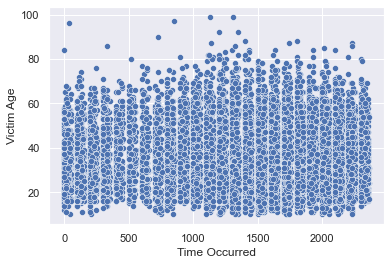

In [57]:
sns.scatterplot(data = df, x = "Time Occurred", y = "Victim Age");

No vemos que haya ninguna relación de edad y hora, ya que hay crímenes a todas horas, a víctimas de todas las edades.

In [58]:
# investigamos ahora sobre las correlaciones de nuestros datos del df

m_correlacion_pandas = df.corr()
m_correlacion_pandas

,Unnamed: 0,Unnamed: 0.1,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Code,Year
Unnamed: 0,1.000000,0.999909,0.456000,0.003899,0.454634,0.454788,0.029541,-0.027431,0.037119,-0.005670,NaN
Unnamed: 0.1,0.999909,1.000000,0.448150,0.003578,0.446724,0.446886,0.030006,-0.027029,0.037359,-0.005178,NaN
DR Number,0.456000,0.448150,1.000000,0.018026,0.993888,0.993086,-0.006313,-0.064522,0.009473,-0.047843,NaN
Time Occurred,0.003899,0.003578,0.018026,1.000000,0.018481,0.019376,0.030231,-0.004043,-0.002960,0.009222,NaN
Area ID,0.454634,0.446724,0.993888,0.018481,1.000000,0.999210,-0.005617,-0.064462,0.009444,-0.048915,NaN
Reporting District,0.454788,0.446886,0.993086,0.019376,0.999210,1.000000,-0.005109,-0.064531,0.009681,-0.048174,NaN
Crime Code,0.029541,0.030006,-0.006313,0.030231,-0.005617,-0.005109,1.000000,0.010652,0.089157,0.351180,NaN
Victim Age,-0.027431,-0.027029,-0.064522,-0.004043,-0.064462,-0.064531,0.010652,1.000000,0.002158,0.081374,NaN
Premise Code,0.037119,0.037359,0.009473,-0.002960,0.009444,0.009681,0.089157,0.002158,1.000000,0.084856,NaN
Weapon Used Code,-0.005670,-0.005178,-0.047843,0.009222,-0.048915,-0.048174,0.351180,0.081374,0.084856,1.000000,NaN


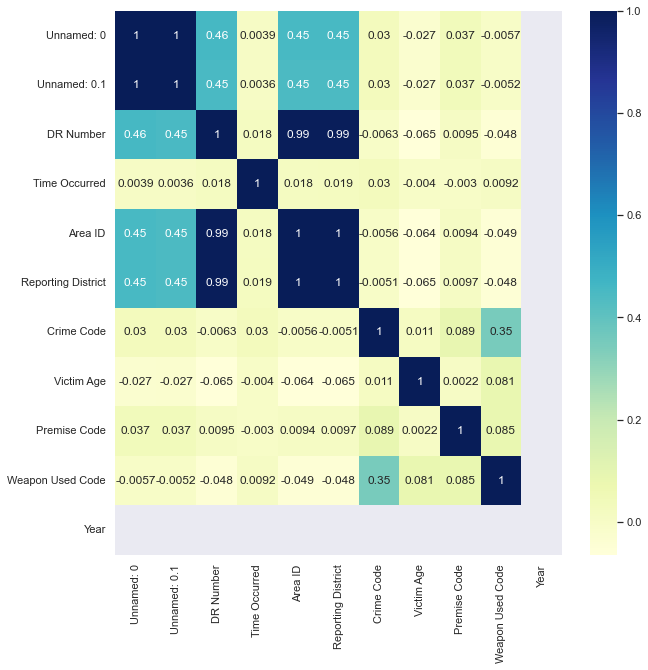

In [60]:
# hacemos un heatmap para verlo en una grafica

plt.figure(figsize = (10,10))
sns.heatmap(m_correlacion_pandas,
            cmap = "YlGnBu", # para cambiar el color
           annot = True); # para sacar el valor de la correlación

Como podemos ver en el heatmap, las correlaciones existentes en nuestras variables contínuas se dan por la misma naturaleza descriptivos de los datos. Es decir, el número de caso con el reporting district o area id, que seguramente vaya ligado con el código de cada caso para saber donde ha sucedido y qué comisaria lo ha llevado. También entre el crime code y el used weapon, se podría dar debido a que los códigos de los crímenes, muchas veces ya se diseñan pensando en la implicación de un arma o no.

Ahora queremos ver como de relacionadas están las zonas de los Angeles con el tipo de crímen que se produce

In [62]:
df.describe(include=object)

,Date Reported,Date Occurred,Area Name,Crime Code Description,MO Codes,Victim Sex,Victim Descent,Premise Description,Weapon Description,Status Code,Status Description,Address,Cross Street,Location
count,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961
unique,252,252,21,76,10064,3,13,101,63,5,5,2351,2569,6208
top,08/20/2017,04/23/2017,77th Street,ROBBERY,0416,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,6TH ST,BROADWAY,"(0, 0)"
freq,82,86,1361,2959,463,7448,6616,6343,6917,9944,9944,208,262,366


In [63]:
# creamos nuestra crosstab para las dos columnas en las que estamos interesadas

data_crosstab = pd.crosstab(df['Area Name'], df['Crime Code Description'])

In [69]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
data_crosstab.T

Area Name,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,Northeast,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
Crime Code Description,,,,,,,,,,,,,,,,,,,,,
ARSON,2,1,0,0,1,0,2,0,2,0,0,0,0,0,0,1,0,0,0,0,0
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,5,1,2,1,0,2,4,2,3,0,0,0,1,1,2,0,0,0,0,0,1
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",310,297,38,79,128,127,123,107,68,249,89,105,91,166,252,255,53,61,26,65,76
ATTEMPTED ROBBERY,41,34,4,9,10,8,21,12,12,53,6,31,9,40,46,36,7,13,7,11,17
BATTERY - SIMPLE ASSAULT,156,379,57,51,102,83,194,89,112,143,95,187,131,181,157,166,43,85,72,73,69
BATTERY ON A FIREFIGHTER,0,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
BATTERY POLICE (SIMPLE),9,6,0,1,1,2,9,0,2,4,2,1,7,6,2,6,1,1,0,2,2
BATTERY WITH SEXUAL CONTACT,6,18,2,13,6,6,12,6,12,12,10,13,12,14,12,17,6,6,5,6,8
BIKE - STOLEN,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


Como podemos ver en la tabla de frecuencias de arriba, hay crímenes que se suelen dar con mayor frecuencia, como por ejemplo, robbery, intimate partner simple assault, battery simple assault y assault with deadly wapon aggravated assault, y vemos tambien que los números de crímenes cometidos de este tipo varían también dependiendo de la zona de LA, por lo que podemos decir que vemos una correlación entre estas variables categóricas.

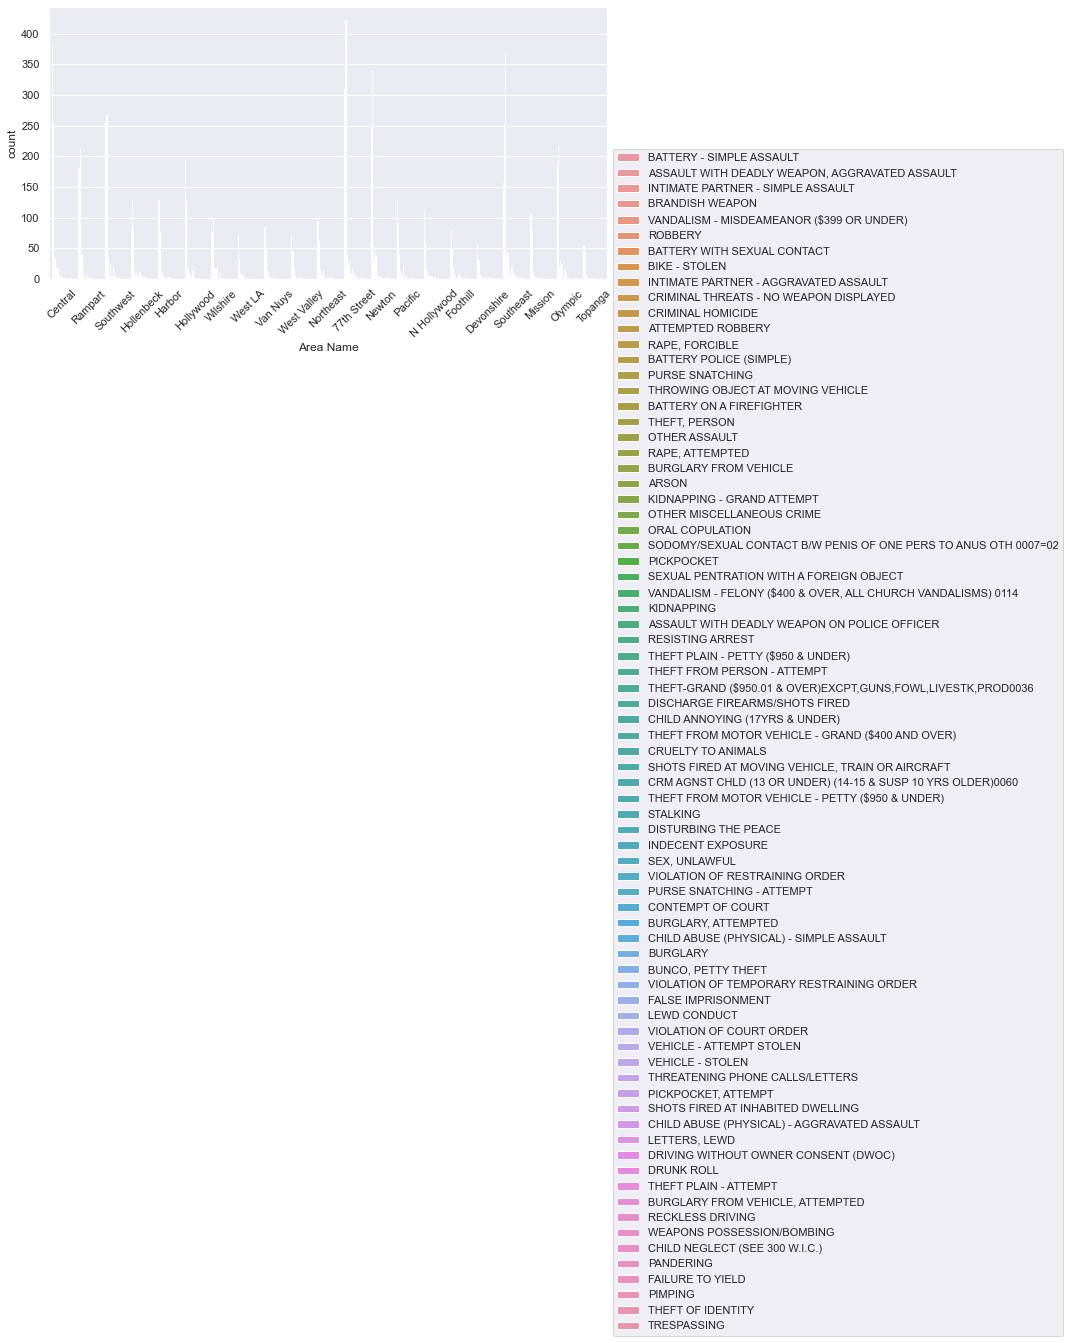

In [77]:
plt.figure(figsize = (10,5))  # establecemos el tamaño de la gráfica
sns.countplot(data = df, x = "Area Name", hue = "Crime Code Description") # hacemos el countplot.
plt.xticks(rotation = 45) # rotamos las etiquetas del eje x para que estén a 45 grados
plt.legend( bbox_to_anchor=(1, 0.5));  # movemos la leyenda para colocarla fuera del plot.